- 시계열 데이터는 같은 시간 간격동안 수집되는 형태의 데이터.  
- 시계열 데이터의 특성. 자기상관(auto-correlation)이 매우 강함
- 크게 4가지 변동으로 구성(분해 가능) : 추세(Trend) , 순환(Cycle), 계정(Seasonal), 우연(Random)
- 이러한 변동은 데이터 전처리 단계에서 시각화로 파악한 뒤 요소분해(decomposition)통해 필요한 전처리 진행

- 정상(stationary) 시계열이란? 시점에 따라 평균과 분산이 변하지 않고, 공분산이 시차에 의해서만 의존 (시점에 무관) : 시점 t와  t+k 사이의 공분산을 함수로 보면 r(k) 다 t 자체는 영향을 주지 않는다.
- 등분산성(↔ 이분산성, Heteroskedasticity) : 시점에 따라 분산이 동일하다는것. 시계열 데이터는 등분산성이 충족되지 않고 시간이 지남에 따라 분산이 커지는 경우가 많다.

- 정상성을 확인하기 위한 검정 방법
    - **단위근(Unit Root)** 존재여부 검정 : 단위근이란 시계열 데이터에서 자기회귀 모형(AR 모형) 중에서 계수 값이 1인 경우, 포착하고자 하는 데이터의 내재적인 특징. 단위근은 시계열이 정상성을 갖지 못하는 주요 원인. 단위근이 존재하는 시계열은 비정상(Non-Stationary) tlrPduf
    1.  **KPSS(Kwiatkowski-Phillips-Schmidt-Shin Test) 검정**: (H0) 단위근이 존재하지 않을 것이다.
    2.  **ADF(Augemented Dickey-Fullter Test) 검정**: (H0) 단위근이 존재할 것이다. 

In [35]:
import pandas as pd
import numpy as np

ts = pd.read_csv("time_series.csv")
ts.head()

,MeanTemp
0,28.888889
1,25.555556
2,24.444444
3,23.888889
4,27.777778


In [39]:
# adfuller library
from statsmodels.tsa.stattools import adfuller

# Check adfuller
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])

check_adfuller(ts)
# 귀무가설 기각하지 못하는 수준으로, 단위근 존재. -> 데이터가 정상성이 없음 -> 차분등의 조치가 필요.

Test statistic:  -1.409596674588777
p-value:  0.577666802852635
Critical Values: {'1%': -3.439229783394421, '5%': -2.86545894814762, '10%': -2.5688568756191392}


#### 차분(Difference)
- 먼저 시차(lag)란, 예측시점과 예측을 위해 활용/참조하는 특정 과거 시점과의 시간차이이다. 
- 차분(Differencing)을 한다는 것은, 추세를 제거하여 데이터가 정상성(stationarity)을 갖도록, 데이터를 시차 단위로 차이값을 계산하는 것을 말한다. 
- 역차분(Inverse Difference)란? 모델링이 끝난 뒤에는 차분 데이터를 원시계열로 복원을 하기 위한 과정. 우리가 일반 데이터를 정규화하고 원복 하거나, 인코딩하고 디코딩하는 것처럼. 시계열은 자기상관성을 없애고 정상 시계열로 만들기 위해 차분을 하고, 역차분을 해주는 개념.

#### 시계열 데이터의 EDA 

- 대표적으로 스무딩(smoothing)과 필터링(filtering) 방법이 있다. 
- 시계열 데이터는 크게 시간(time) domain과 주파수(frequency) domain으로 나눠볼 수 있다. 시간 도메인은, 시간축이 동일 간격의 discrete 한 값이다 (일별 주가 데이터처럼). 주파수 도메인은, 시간축이 연속적인 값이다 (라디오 주파수, 설비의 진동 데이터 처럼). 일반적으로 스무딩은 시간 데이터에서, 필터링은 주파수 데이터에서 많이 사용된다. 
- 이동평균(Moving Average)은, 사전에 정해놓은 크기로 말 그대로 움직이면서 평균을 구하는 방식이다. 주식차트의 30일, 60일 이평선을 생각하면 된다. 윈도크기 (window size)가 클수록 더 스무드 해진다. 
- 단순평균을 하면 단순 이동평균 (SMA, Simple MA)이고, 윈도 내에서 최근 데이터에 더 많은 가중치를 주면 지수 이동평균 (EMA, Exponentail MA) 혹은 가중 이동평균 (Weighted MA)이다. 
- 이중 이동평균 (Double Moving Average) 은, 이동평균의 결과에 한번 던 MA 방식으로 스무딩 한 것이다. 아래 그림처럼 스무딩을 여러 번 할수록 더 스무드 해지고, 평균에 가까워진다. 

In [37]:
# 이동평균 시각화 코드 예시 

import matplotlib.pyplot as plt

def check_mean_std(ts):
    # Rolling statistics
    rolmean = ts.rolling(6).mean()
    rolstd = ts.rolling(6).std()

    plt.figure(figsize=(12,4))
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()

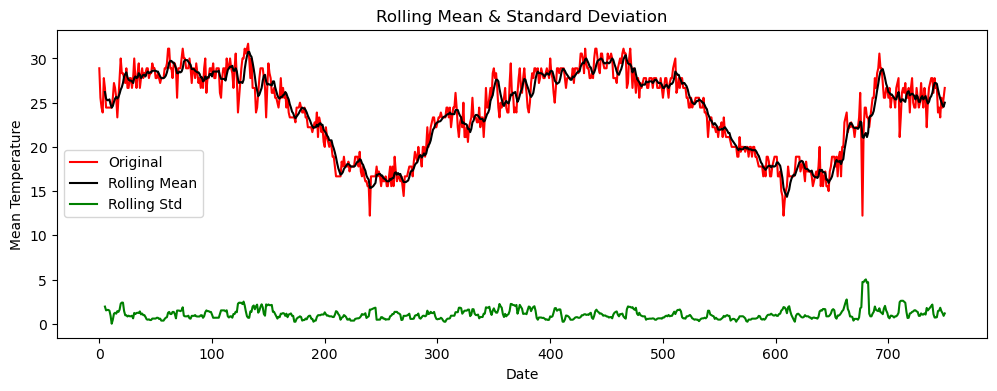

In [38]:
check_mean_std(ts)

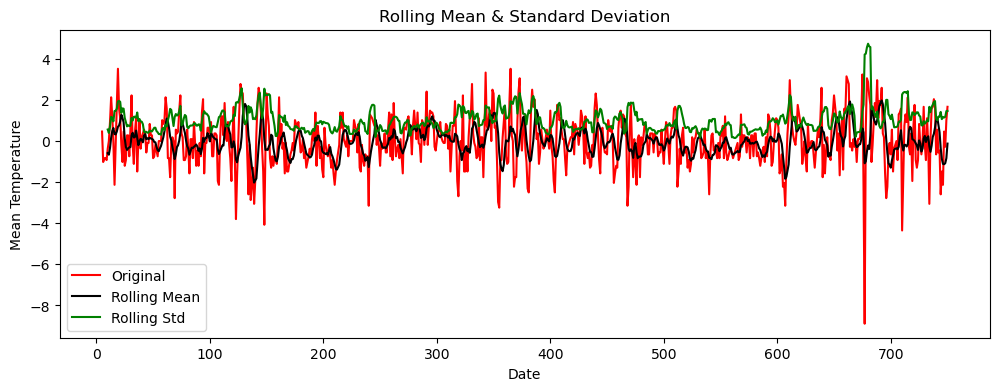

Test statistic:  -11.138514335138503
p-value:  3.150868563164177e-20
Critical Values: {'1%': -3.4392539652094154, '5%': -2.86546960465041, '10%': -2.5688625527782327}


In [ ]:
# 이동평균 값을 차분한 뒤 차분결과 시각화 및 ADF 테스트 
moving_avg = ts.rolling(6).mean()
ts_moving_avg_diff = ts - moving_avg
ts_moving_avg_diff.dropna(inplace=True) # first 6 is nan value due to window size

# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_moving_avg_diff)
check_adfuller(ts_moving_avg_diff.MeanTemp)

'''
차분은 아래와 같이 간단히 실행 가능하기도함. 

ts_diff1 = ts.diff().dropna()  # 1차 차분
ts_diff2 = ts_diff1.diff().dropna()  # 2차 차분 (필요한 경우)
'''

#### 정규성 검증
- 추세나, 계절성을 제거한 시계열 데이터, 혹은 예측모델의 잔차 시계열 데이터의 정규성을 검증하기 위해서는 scipy 모듈을 통해 기술 통계량을 확인하거나 (외도 : skewness, 첨도 : kurtosis 확인), Q-Q plot 을 그려보는 방법이 있다. 
- Q-Q plot 은, 두개의 분포가 동일한지를 검정하는데 한쪽은 일반적으로 정규분포이다. 즉, 정규성 검증 목적으로 사용한다. 두 데이터 분포의 각 분위수의 값을 비교하는 것이다.
- 예를들어, 아래 그림과 같이 정규분포를 따른다면 빨강선에 가까워야하는데 실제 분포(파란색)는 끝값일 수록 정규선과 많이 떨어져있다. 분위수가 3일때 가져야하는 값보다 실제 분포의 값이 훨씬 크다는 것의 의미는 => 꼬리가 더 두껍다는 의미이다 (Fat tail). 

Skewness Test p-value: 0.0000001
Kurtosis Test p-value: 0.0000000
Normality Test p-value: 0.0000000


Text(0.5, 1.0, 'Log Return Series Q-Q Plot')

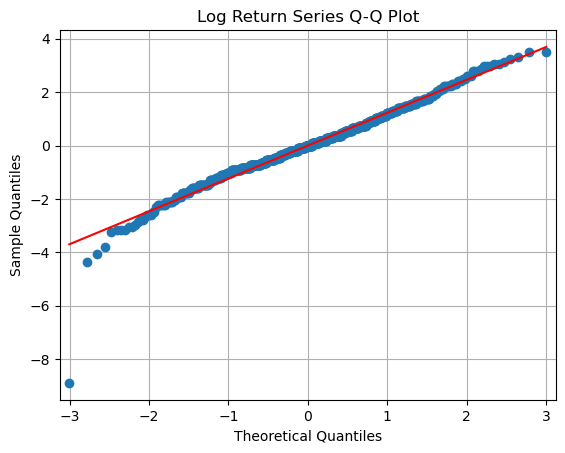

In [63]:
import scipy.stats as scs
import statsmodels.api as sm

log_return = ts_moving_avg_diff.to_numpy().flatten()
scs.describe(log_return)

# 결과 : DescribeResult(nobs=2061, minmax=(-0.1318402493393368, 0.08498951097376323), mean=0.0007197172841477838, variance=0.0002540709504954039, skewness=-0.23410408355207943, kurtosis=4.910552582890452)
# skew 는 0에 가까울수록 대칭적인데, 1을 넘어가면 매우 비대칭적. kurt 는 3이면 정규분포 정도.. 3보다 크면 뾰족

print("Skewness Test p-value: {:.7f}".format( scs.skewtest(log_return)[1]) ) # 샘플의 왜도가 정규분포와 일치하는지(0에 가까운 값을 가지는지 판단)
print("Kurtosis Test p-value: {:.7f}".format( scs.kurtosistest(log_return)[1]) ) # 샘플의 첨도가 정규분포와 일치하는지(0에 가까운 값을 가지는지 판단)
print("Normality Test p-value: {:.7f}".format( scs.normaltest(log_return)[1]) ) # 영가설: 샘플의 분포가 정규분포이다. (유의확률이 클수록 정규분포 가설을 강하게 지지)

sm.qqplot(log_return.flatten(), line='s')
plt.grid(True)
plt.xlabel("Theoretical Quantiles") #  (정규분포 상의 이론적 분위수)
plt.ylabel("Sample Quantiles") # (샘플 분위수)
plt.title("Log Return Series Q-Q Plot") # 강한 fat-tail

# 요소분해 (Decomposition)
 

- 시계열 데이터의 여러 가지 변동 성분 (추세, 계절, 주기 등) 유무와 크기를 파악하기 위한 대표적 방법
- 수행 목적은? 추세와 주기 변동을 제거하고, 남은 잔차(residual) 시계열 자료를 우연변동에 의한 정상 시계열로 만들기 위함. 잔차(residual)는 white noise 가 돼야 한다. 일반 데이터의 정규화 과정과 같은 개념이다.  
- 요소분해는 분해 방법에 따라, 선형적인 가법모형(Additive) 비선형적인 승법모형(Multiplicative)으로 구분된다. 
- 요소분해 이후 trend 나 seasonality가 있다면 차분, 이동평균등을 사용한다. 
- 요소분해(Decomposition) 후 남은 Residual(잔차)가 정상성을 가지면, 우리가 추세와 계절성을 올바르게 제거했다는 의미. 잔차가 비정상이면, 데이터에 남아 있는 구조적 패턴을 제대로 제거하지 못했음을 의미.

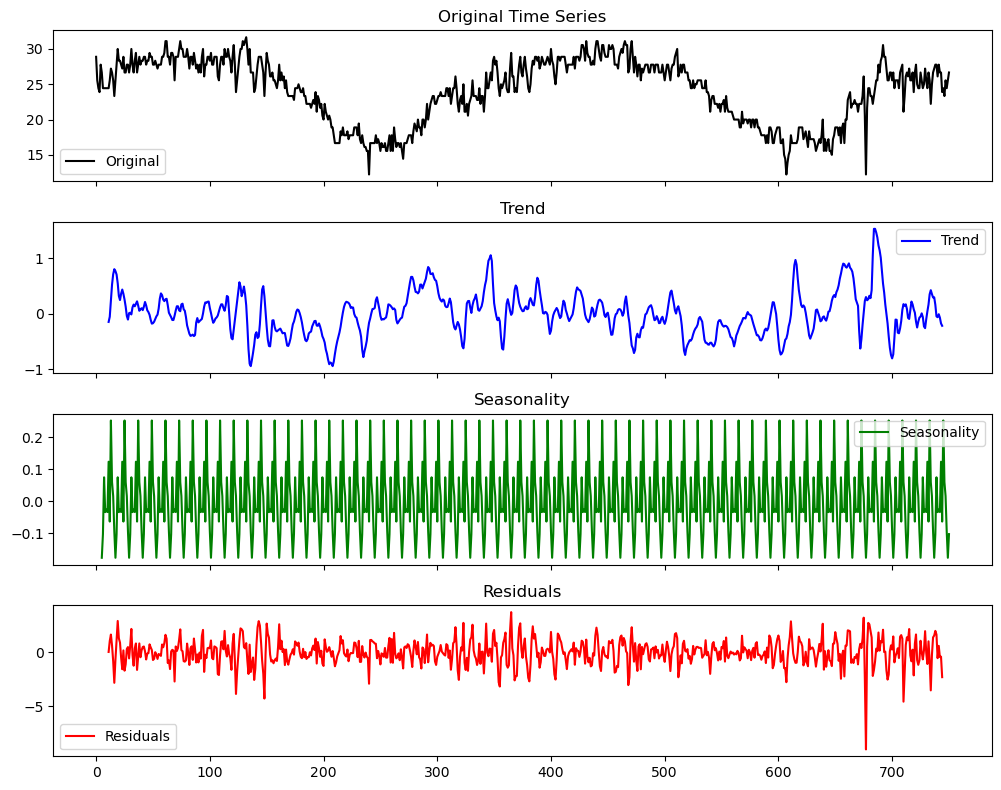

In [72]:
from statsmodels.tsa.seasonal import seasonal_decompose

# 요소분해 수행 (가법 모델)
decomp = seasonal_decompose(ts, model='additive', period=12)  # 월별 데이터이므로 period=12

# 요소별 시각화
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
axes[0].plot(ts, label='Original', color='black')
axes[0].set_title('Original Time Series')
axes[0].legend()

axes[1].plot(decomp.trend, label='Trend', color='blue')
axes[1].set_title('Trend')
axes[1].legend()

axes[2].plot(decomp.seasonal, label='Seasonality', color='green')
axes[2].set_title('Seasonality')
axes[2].legend()

axes[3].plot(decomp.resid, label='Residuals', color='red')
axes[3].set_title('Residuals')
axes[3].legend()

plt.tight_layout()
plt.show()


#### 요소분해 후 잔차 정규성 검증 (white noise)
- 잔차(Residuals)가 white noise인지 확인하려면 정규성 검정과 ACF/PACF 분석을 수행
- p-value가 0.05보다 크면 정규성을 만족할 가능성이 높음.
- ACF/PACF에서 상관성이 없다면, 잔차가 정상성을 띄고 white noise에 가까워짐.

Skewness Test p-value: 0.00000
Kurtosis Test p-value: 0.00000
Normality Test p-value: 0.00000


c:\Users\bmseo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


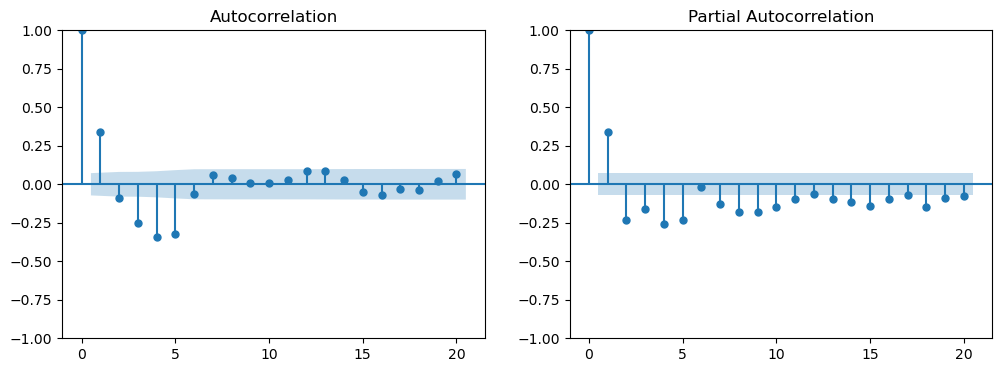

In [73]:
import scipy.stats as scs
import statsmodels.api as sm

residuals = decomp.resid.dropna()

# 정규성 검정 (p-value가 0.05보다 크면 정규성 만족)
print("Skewness Test p-value: {:.5f}".format(scs.skewtest(residuals)[1]))
print("Kurtosis Test p-value: {:.5f}".format(scs.kurtosistest(residuals)[1]))
print("Normality Test p-value: {:.5f}".format(scs.normaltest(residuals)[1]))

# ACF/PACF 플롯
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sm.graphics.tsa.plot_acf(residuals, lags=20, ax=axes[0])
sm.graphics.tsa.plot_pacf(residuals, lags=20, ax=axes[1])
plt.show()